In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import pandas as pd
import random
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import numpy as np
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Model

In [3]:
x = np.load('/content/drive/MyDrive/Datasets/fold1/images.npy')
y = np.load('/content/drive/MyDrive/Datasets/fold1/types.npy')


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 1)


In [6]:
print(x_train.shape, y_train.shape)

(2124, 256, 256, 3) (2124,)


((2124, 256, 256, 3), (2124,))
((775, 256, 256, 3), (775,))
((574, 256, 256, 3), (574,))
((775, 256, 256, 3), (775,))
((532, 256, 256, 3), (532,))
((425, 256, 256, 3), (425,))
((107, 256, 256, 3), (107,))


In [11]:
print(x.shape, y.shape)

(2656, 256, 256, 3) (2656,)


In [12]:
print(x_train.shape, y_train.shape)

(2124, 256, 256, 3) (2124,)


In [ ]:
print((x_train.shape, y_train.shape))


In [8]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
#encoding y_train

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

y_train = onehot_encoded

[ 3  5 13 ...  4  3 18]


In [23]:
#encoding y_test

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_test = onehot_encoded

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [5]:
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train, y_train, test_size=.27, random_state=1)
x_train1, x_train3, y_train1, y_train3 = train_test_split(x_train1, y_train1, test_size=.50, random_state=1)


In [17]:
x_test, x_test2, y_test, y_test2 = train_test_split(x_test, y_test, test_size=0.5, random_state= 1)

In [6]:
print((x_train1.shape, y_train1.shape))
print((x_train2.shape, y_train2.shape))
print((x_train3.shape, y_train3.shape))
print((x_test.shape, y_test.shape))
#print((x_test1.shape, y_test1.shape))
print((x_test2.shape, y_test2.shape))

((775, 256, 256, 3), (775,))
((574, 256, 256, 3), (574,))
((775, 256, 256, 3), (775,))
((532, 256, 256, 3), (532,))
((425, 256, 256, 3), (425,))
((107, 256, 256, 3), (107,))


In [9]:
## encoding y_train1
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train1)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_train1 = onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [10]:

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train2)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_train2 = onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [11]:

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train3)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_train3 = onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test2)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_test2 = onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# print((x_test.shape, y_test.shape))

# print((x_train1.shape, y_train1.shape))
# print((x_train2.shape, y_train2.shape))

In [ ]:
# y_test = to_categorical(y_test)
# y_train1 = to_categorical(y_train1)
# y_train2 = to_categorical(y_train2)

In [19]:
#print((x_test1.shape, y_test1.shape))
print((x_test2.shape, y_test2.shape))

print((x_train1.shape, y_train1.shape))
print((x_train2.shape, y_train2.shape))
print((x_train3.shape, y_train3.shape))

((266, 256, 256, 3), (266, 19))
((775, 256, 256, 3), (775, 19))
((574, 256, 256, 3), (574, 19))
((775, 256, 256, 3), (775, 19))


**REsNet50 using for folder 1**

In [33]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

In [34]:
train_generator.fit(x_train)

In [35]:
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

In [36]:
test_generator.fit(x_test)

In [ ]:
# #Learning Rate Annealer
# from keras.callbacks import ReduceLROnPlateau
# lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [37]:
#Initializing ResNet50
from tensorflow.keras.applications import ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

In [38]:
#Adding layers to the ResNet50
model_resnet= Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_5 (Dense)             (None, 1024)              134218752 
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)              

In [39]:
from tensorflow.keras.optimizers import SGD


In [40]:
model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train ,y_train, epochs=20, validation_data =(x_test, y_test), verbose=1)

Epoch 1/20
67/67 [==============================] - 210s 3s/step - loss: 1.9219 - accuracy: 0.4647 - val_loss: 7.8015 - val_accuracy: 0.1729
Epoch 2/20
67/67 [==============================] - 212s 3s/step - loss: 1.4994 - accuracy: 0.5410 - val_loss: 3.8772 - val_accuracy: 0.2180
Epoch 3/20
67/67 [==============================] - 211s 3s/step - loss: 1.3326 - accuracy: 0.5965 - val_loss: 2.1223 - val_accuracy: 0.4342
Epoch 4/20
67/67 [==============================] - 212s 3s/step - loss: 1.1493 - accuracy: 0.6629 - val_loss: 7.4262 - val_accuracy: 0.2575
Epoch 5/20
67/67 [==============================] - 211s 3s/step - loss: 0.8753 - accuracy: 0.7293 - val_loss: 1.8589 - val_accuracy: 0.5714
Epoch 6/20
67/67 [==============================] - 211s 3s/step - loss: 0.6931 - accuracy: 0.7886 - val_loss: 1.4229 - val_accuracy: 0.5865
Epoch 7/20
67/67 [==============================] - 208s 3s/step - loss: 0.4491 - accuracy: 0.8602 - val_loss: 1.2156 - val_accuracy: 0.6635
Epoch 8/20
67

In [ ]:
model_resnet.save('resNet50 epoch 20 fold1 x_train.h5')

**ResNet50 Model for ensembling, fold 1**

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )
train_generator.fit(x_train1)
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)
test_generator.fit(x_test2)


#Adding layers to the ResNet50
model_resnet= Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_resnet.summary()

model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train1 ,y_train1, epochs=20, validation_data =(x_test2, y_test2), verbose=1)
model_resnet.save('resNet50-epoch25-fold1.h5')

94781440/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 1024)              134218752 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                         

**VGG19 using for folder1**

In [24]:
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size = 128, epochs = 25, verbose = 1, validation_data = (x_test, y_test))

	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fold1 20 epoch x_train.h5')


run_test_harness()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/25
17/17 [==============================] - 142s 8s/step - loss: 8.2272 - accuracy: 0.2637 - val_loss: 3.7939 - val_accuracy: 0.3985
Epoch 2/25
17/17 [==============================] - 140s 8s/step - loss: 2.2094 - accuracy: 0.4430 - val_loss: 2.3498 - val_accuracy: 0.3684
Epoch 3/25
17/17 [==============================] - 139s 8s/step - loss: 1.5983 - accuracy: 0.5315 - val_loss: 2.2825 - val_accuracy: 0.4511
Epoch 4/25
17/17 [==============================] - 132s 8s/step - loss: 1.2897 - accuracy: 0.6036 - val_loss: 2.2206 - val_accuracy: 0.4549
Epoch 5/25
17/17 [==============================] - 137s 8s/step - loss: 1.0819 - accuracy: 0.6615 - val_loss: 2.2739 - val_accuracy: 0.4549
Epoch 6/25
17/17 [==============================] - 137s 8s/step - loss: 0.9025 - accuracy: 0.7218 - val_loss: 2.3362 - val_accuracy: 0.4586
Epoch 7/25
17/17 [==============================] - 135s 8s/step - loss: 0.7629 - accuracy: 0.7637 - val_loss: 2.3917 - val_accuracy: 0.4699
Epoch 8/25
17

**VGG19 for ensembling fold 1**

In [25]:
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train2, y_train2, batch_size = 128, epochs = 30, verbose = 1, validation_data = (x_test2, y_test2))

	# evaluate model
	_, acc = model.evaluate(x_train2, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19-epoch30-fold1.h5')


run_test_harness()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
5/5 [==============================] - 49s 10s/step - loss: 14.7568 - accuracy: 0.1429 - val_loss: 8.1119 - val_accuracy: 0.2932
Epoch 2/30
5/5 [==============================] - 47s 10s/step - loss: 6.2010 - accuracy: 0.2422 - val_loss: 5.3788 - val_accuracy: 0.1767
Epoch 3/30
5/5 [==============================] - 47s 10s/step - loss: 2.5485 - accuracy: 0.4077 - val_loss: 3.3515 - val_accuracy: 0.3233
Epoch 4/30
5/5 [==============================] - 47s 10s/step - loss: 1.4820 - accuracy: 0.5523 - val_loss: 2.9056 - val_accuracy: 0.3271
Epoch 5/30
5/5 [==============================] - 47s 10s/step - loss: 1.1110 - accuracy: 0.6324 - val_loss: 2.7879 - val_accuracy: 0.3308
Epoch 6/30
5/5 [==============================] - 47s 10s/step - loss: 0.8274 - accuracy: 0.7404 - val_loss: 2.7910 - val_accuracy: 0.3346
Epoch 7/30
5/5 [==============================] - 47s 10s/step - loss: 0.6189 - accuracy: 0.8101 - val_loss: 2.8449 - val_accuracy: 0.3496
Epoch 8/30
5/5 [==========

**VGG16 using for folder 1**

In [25]:
# from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=25, verbose=1, validation_data = (x_test, y_test))
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fold1 20 epoch y_train.h5')


run_test_harness()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/25
67/67 [==============================] - 100s 1s/step - loss: 4.0679 - accuracy: 0.3559 - val_loss: 2.0148 - val_accuracy: 0.4229
Epoch 2/25
67/67 [==============================] - 99s 1s/step - loss: 1.6295 - accuracy: 0.5033 - val_loss: 2.0624 - val_accuracy: 0.4511
Epoch 3/25
67/67 [==============================] - 99s 1s/step - loss: 1.3815 - accuracy: 0.5541 - val_loss: 1.9838 - val_accuracy: 0.4680
Epoch 4/25
67/67 [==============================] - 99s 1s/step - loss: 1.2065 - accuracy: 0.6045 - val_loss: 1.9954 - val_accuracy: 0.4868
Epoch 5/25
67/67 [==============================] - 99s 1s/step - loss: 1.0451 - accuracy: 0.6464 - val_loss: 1.9738 - val_accuracy: 0.5019
Epoch 6/25
67/67 [==============================] - 98s 1s/step - loss: 0.9191 - accuracy: 0.6926 - val_loss: 2.0434 - val_accuracy: 0.5075
Epoch 7/25
67/67 [==============================] - 99s 1s/step - loss: 0.7937 - accuracy: 0.7359 - val_loss: 2.1179 - val_accuracy: 0.5019
Epoch 8/25
67/67 [=

**Model VGG16 using for ensemble fold1**

In [26]:
# from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train3, y_train3, epochs=30, verbose=1, validation_data = (x_test2, y_test2))
	# evaluate model
	_, acc = model.evaluate(x_train3, y_train3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16-epoch20-fold1.h5')


run_test_harness()

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
25/25 [==============================] - 51s 2s/step - loss: 6.6257 - accuracy: 0.2813 - val_loss: 2.6032 - val_accuracy: 0.3083
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.7181 - accuracy: 0.4787 - val_loss: 2.5071 - val_accuracy: 0.4173
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.2623 - accuracy: 0.6013 - val_loss: 2.4666 - val_accuracy: 0.4135
Epoch 4/30
25/25 [==============================] - 49s 2s/step - loss: 0.9986 - accuracy: 0.6761 - val_loss: 2.6928 - val_accuracy: 0.4662
Epoch 5/30
25/25 [==============================] - 49s 2s/step - loss: 0.7468 - accuracy: 0.7548 - val_loss: 2.7621 - val_accuracy: 0.4511
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 0.6022 - accuracy: 0.7961 - val_loss: 2.8974 - val_accuracy: 0.4586
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 0.4975 - accuracy: 0.8477 - val_loss: 3.0520 - val_accuracy: 0.4474
Epoch 8/30
25/25 [==

**DenseNet using for fold1**

In [18]:
import tensorflow as tf
base_model_denseNet= tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=y_train.shape[1],
    
)

In [19]:
#Adding layers to the ResNet50
model_dense=Sequential()
#Add the Dense layers along with activation and batch normalization
model_dense.add(base_model_denseNet)
model_dense.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_dense.add(Dense(1024,activation=('relu'), input_dim=512))
model_dense.add(Dense(512,activation=('relu'))) 
model_dense.add(Dropout(.4))
model_dense.add(Dense(256,activation=('relu'))) 
model_dense.add(Dropout(.3))
model_dense.add(Dense(128,activation=('relu')))
model_dense.add(Dropout(.2))
model_dense.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_dense.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 8, 8, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 106496)            0         
                                                                 
 dense_1 (Dense)             (None, 1024)              109052928 
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [20]:
from tensorflow.keras.optimizers import SGD

In [22]:
model_dense.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
dense_net_history = model_dense.fit(x_train, y_train, epochs=20,validation_data = (x_test, y_test), verbose=1)

Epoch 1/20
67/67 [==============================] - 413s 6s/step - loss: 2.2087 - accuracy: 0.3668 - val_loss: 3.3461 - val_accuracy: 0.1729
Epoch 2/20
67/67 [==============================] - 406s 6s/step - loss: 1.6689 - accuracy: 0.4901 - val_loss: 3.1319 - val_accuracy: 0.1955
Epoch 3/20
67/67 [==============================] - 404s 6s/step - loss: 1.5399 - accuracy: 0.5325 - val_loss: 2.6728 - val_accuracy: 0.2124
Epoch 4/20
67/67 [==============================] - 413s 6s/step - loss: 1.3681 - accuracy: 0.5852 - val_loss: 1.6116 - val_accuracy: 0.5639
Epoch 5/20
67/67 [==============================] - 447s 7s/step - loss: 1.2278 - accuracy: 0.6299 - val_loss: 1.4265 - val_accuracy: 0.5921
Epoch 6/20
67/67 [==============================] - 431s 6s/step - loss: 1.0608 - accuracy: 0.6794 - val_loss: 1.4851 - val_accuracy: 0.5583
Epoch 7/20
67/67 [==============================] - 441s 7s/step - loss: 0.9266 - accuracy: 0.7298 - val_loss: 1.8201 - val_accuracy: 0.4906
Epoch 8/20
67

In [26]:
model_dense.save('DenseNet fold1 epoch 20')

INFO:tensorflow:Assets written to: DenseNet fold1 epoch 20/assets


**Sequential model1 using for folder1**

In [ ]:
# #Model 1

# #Defining the Convolutional Neural Network
# model1 = Sequential()

# model1.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(64, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(128, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Flatten())

# model1.add(Dense(128, activation = 'relu'))
# model1.add(Dense(19, activation = 'softmax'))


# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model1.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history1 = model1.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model1.save('model 1 fold1 epoch 10.hdf5')

**Sequential model2 using for folder 1**

In [ ]:
# model2 = Sequential()

# model2.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model2.add(Conv2D(32, (3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size = (2, 2)))

# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size = (2, 2)))

# model2.add(Conv2D(128, (3, 3), activation='relu'))
# model2.add(Conv2D(25, (1,1)))

# model2.add(Flatten())

# model2.add(Dense(19, activation = 'softmax'))

# model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model2.summary()

# history2 = model2.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model2.save('model2 fold1 epoch 10.hdf5')

**Sequential Model3 for fold 1**

In [ ]:
# #Model 3
# #
# model3 = Sequential()

# model3.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Conv2D(64, (3, 3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Flatten())

# model3.add(Dense(19, activation = 'softmax'))

# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model3.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history3 = model3.fit(x_train2, y_train2, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model3.save('model3 fold3 epoch 10.hdf5')


**Ensembling all the three models (VGG16, Vgg19, RestNet50)**


In [27]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [28]:
model1 = load_model('resNet50-epoch25-fold1.h5')
model2 = load_model('vgg19-epoch30-fold1.h5')
model3 = load_model('vgg16-epoch20-fold1.h5')


In [29]:
models = [model1, model2, model3] 


In [30]:
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [31]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test2)
prediction2 = model2.predict(x_test2)
prediction3 = model3.predict(x_test2)


In [32]:
accuracy1 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction2, axis=1))
accuracy3 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction3, axis=1))


ensemble_accuracy = accuracy_score(np.argmax(y_test2, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5827067669172933
Accuracy Score for model2 =  0.4398496240601504
Accuracy Score for model3 =  0.45864661654135336
Accuracy Score for average ensemble =  0.5263157894736842


In [33]:
#Weighted average ensemble
models = [model1, model2,model3] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
weights = [.3, .3,.4] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), weighted_ensemble_prediction)

In [34]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5827067669172933
Accuracy Score for model2 =  0.4398496240601504
Accuracy Score for model3 =  0.45864661654135336
Accuracy Score for average ensemble =  0.5263157894736842
Accuracy Score for weighted average ensemble =  0.5263157894736842


In [35]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2,model3] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
ideal_weights = [.3, .3,.4] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)


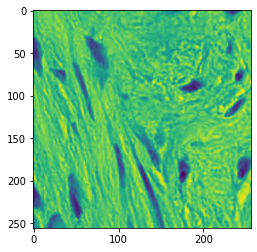

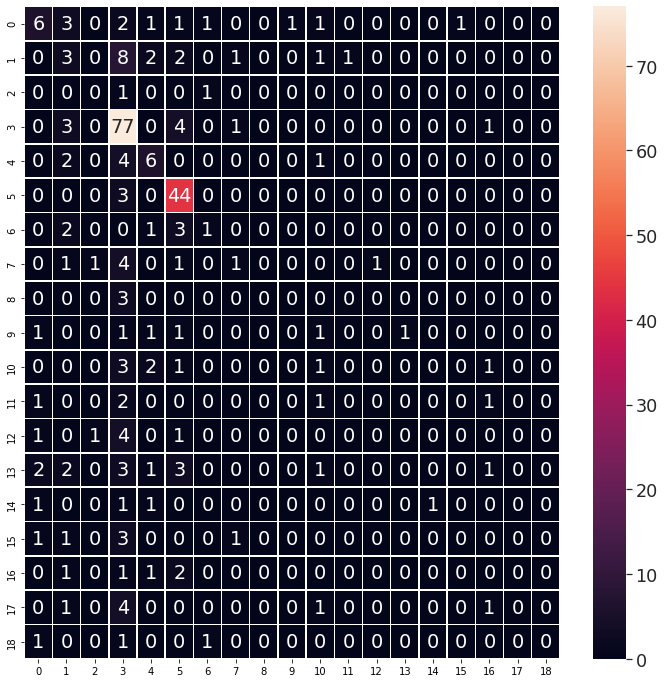

In [36]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test2[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)



**Ensembling model 1 and model 2**

In [37]:
model12 = [model1, model2]


In [38]:
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [39]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test2)
prediction2 = model2.predict(x_test2)


In [40]:
accuracy1 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test2, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5827067669172933
Accuracy Score for model2 =  0.4398496240601504
Accuracy Score for average ensemble =  0.5263157894736842


In [41]:
#Weighted average ensemble
models = [model1, model2] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
weights = [.5,.5] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), weighted_ensemble_prediction)

In [42]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5827067669172933
Accuracy Score for model2 =  0.4398496240601504
Accuracy Score for average ensemble =  0.5263157894736842
Accuracy Score for weighted average ensemble =  0.5413533834586466


In [43]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
ideal_weights = [.5,.5] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)


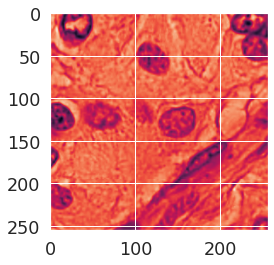

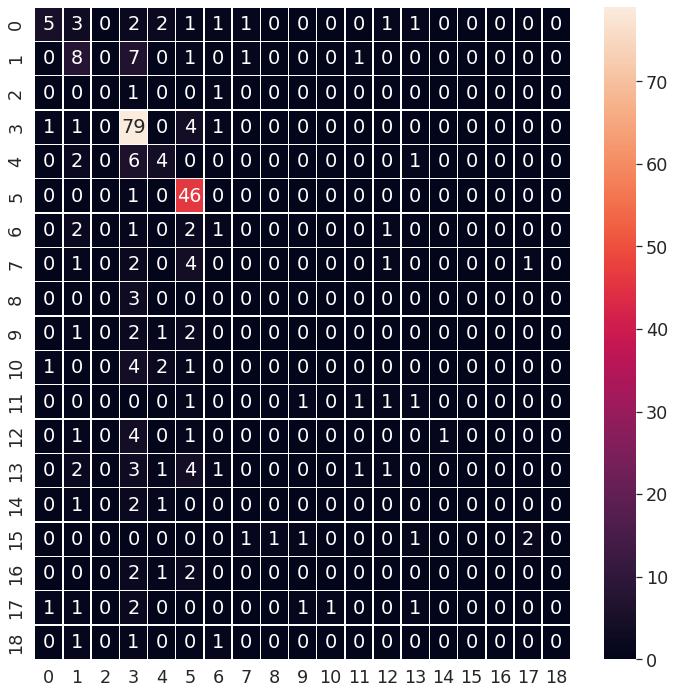

In [44]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test2[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)



**Ensembling model 2 and model 3**

In [45]:
model23 = [model2, model3]

In [46]:
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [47]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test2)
prediction2 = model2.predict(x_test2)


In [48]:
accuracy1 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test2, axis=1), ensemble_prediction)

print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model2 =  0.5827067669172933
Accuracy Score for model3 =  0.4398496240601504
Accuracy Score for average ensemble =  0.5413533834586466


In [49]:
#Weighted average ensemble
models = [model2, model3] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
weights = [.5,.5] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), weighted_ensemble_prediction)

In [50]:
print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model2 =  0.5827067669172933
Accuracy Score for model3 =  0.4398496240601504
Accuracy Score for average ensemble =  0.5413533834586466
Accuracy Score for weighted average ensemble =  0.4699248120300752


In [51]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
ideal_weights = [.5,.5] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)


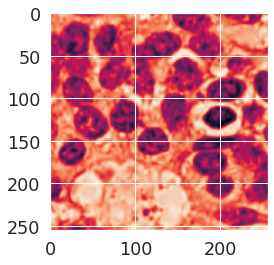

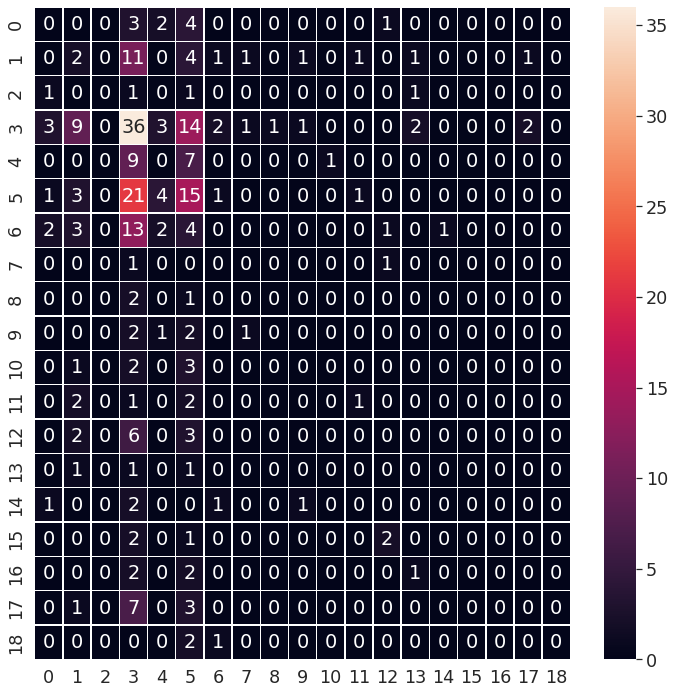

In [52]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test2[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

